Profit for first box:

(Multiplier * 10000)/(I + 100*P)

Profit for second box:

(Multiplier * 10000)/(I + 100*P) - 50,000

(Multiplier- 5I)/500 > P for second box to be profitable

In [149]:
import numpy as np
from scipy.optimize import minimize
import itertools
from tqdm.auto import tqdm
from random import randint
import matplotlib.pyplot as plt

In [ ]:
containers = np.array([(10,1),(80,6),(37,3),(17,1),(90,10),(31,2),(50,4),(20,2),(73,4),(89,8)])

In [4]:
p_values = [(container[0]-5*container[1])/500 for container in containers]

In [5]:
p_values

[np.float64(0.01),
 np.float64(0.1),
 np.float64(0.044),
 np.float64(0.024),
 np.float64(0.08),
 np.float64(0.042),
 np.float64(0.06),
 np.float64(0.02),
 np.float64(0.106),
 np.float64(0.098)]

In [6]:
# First box
worst_case_scenarios = [(10000*container[0])/(container[1]+100) for container in containers]

In [7]:
worst_case_scenarios

[np.float64(990.0990099009902),
 np.float64(7547.169811320755),
 np.float64(3592.233009708738),
 np.float64(1683.1683168316831),
 np.float64(8181.818181818182),
 np.float64(3039.2156862745096),
 np.float64(4807.692307692308),
 np.float64(1960.7843137254902),
 np.float64(7019.2307692307695),
 np.float64(8240.74074074074)]

In [30]:

def minimize_ev(multiplier_1,individuals_1, multiplier_2, individuals_2):
    def function(x):
        p1,p2 = x
        return (multiplier_1 * 10000)/(individuals_1 + 100*p1) + (multiplier_2 * 10000)/(individuals_2 + 100*p2) - 50000

    bounds = [(0,1),(0,1)]
    constraints = [{
    'type': 'ineq',
    'fun': lambda x: 1 - x[0] - x[1]
     }]
    x0 = [1,1]
    return minimize(fun=function,x0=x0,bounds=bounds,constraints=constraints)





In [31]:
result = minimize_ev(10,1,80,6)

In [44]:
container_combos = list(itertools.combinations(containers,2))

In [45]:
len(container_combos)

45

In [46]:
for combo in container_combos:
    if combo[0][0] == combo[1][0] and combo[0][1] == combo[1][1]:
        print(combo)

In [47]:
container_combos = [[combo[0][0],combo[0][1],combo[1][0],combo[1][1]] for combo in container_combos]

In [48]:
len(container_combos)

45

In [49]:
minimums = []
for combo in tqdm(container_combos,"Progress"):
    result = minimize_ev(combo[0],combo[1],combo[2],combo[3])
    minimums.append((result.fun, result.x[0], result.x[1], combo[0], combo[1], combo[2], combo[3]))


Progress: 100%|██████████| 45/45 [00:00<00:00, 218.12it/s]


In [59]:
[",".join([str(i) for i in e[3:]]) for e in sorted(minimums)[::-1][:10]]

['90,10,89,8',
 '80,6,89,8',
 '80,6,90,10',
 '73,4,89,8',
 '90,10,73,4',
 '80,6,73,4',
 '50,4,89,8',
 '90,10,50,4',
 '80,6,50,4',
 '50,4,73,4']

In [75]:
ratios = [container[0]/container[1] for container in containers]

In [76]:
ratios = np.array([ratio/sum(ratios) for ratio in ratios])

In [77]:
ratios

array([0.07749435, 0.1033258 , 0.09557636, 0.13174039, 0.06974491,
       0.12011624, 0.09686794, 0.07749435, 0.14142719, 0.08621246])

In [78]:
sum(ratios)

np.float64(0.9999999999999999)

In [66]:
container_combos[:5]

[[np.int64(10), np.int64(1), np.int64(80), np.int64(6)],
 [np.int64(10), np.int64(1), np.int64(37), np.int64(3)],
 [np.int64(10), np.int64(1), np.int64(17), np.int64(1)],
 [np.int64(10), np.int64(1), np.int64(90), np.int64(10)],
 [np.int64(10), np.int64(1), np.int64(31), np.int64(2)]]

In [71]:
indexed_combos = list(itertools.combinations([*range(10)],2))

In [72]:
len(indexed_combos)

45

In [83]:
indexed_combos+=[(j,i) for i,j in indexed_combos]

In [84]:
len(indexed_combos)

90

In [184]:
def evaluate_combo(containers, combo,ratios):
    multiplier_1 = containers[combo[0]][0]
    individuals_1 = containers[combo[0]][1]
    multiplier_2 = containers[combo[1]][0]
    individuals_2 = containers[combo[1]][1]
    p1 = ratios[combo[0]]
    p2 = ratios[combo[1]]
    return (10000*multiplier_1)/(individuals_1 + 100*p1) + (10000*multiplier_2)/(individuals_2 + 100*p2) - 50000
def evaluate_combo_but_on_first(containers, combo, ratios):
    multiplier_1 = containers[combo[0]][0]
    individuals_1 = containers[combo[0]][1]
    multiplier_2 = containers[combo[1]][0]
    individuals_2 = containers[combo[1]][1]
    p1 = ratios[combo[0]]
    p2 = ratios[combo[1]]
    return (10000*multiplier_1)/(individuals_1 + 100*p1)
def maximize_with_prior(containers,ratios,power,combos,top):
   raised_prior = ratios**power
   values = []
   for combo in combos:
         value = evaluate_combo(containers,combo,raised_prior)
         values.append((float(value),containers[combo[0]],containers[combo[1]],combo))
#    print(values)
   return sorted(values,key=lambda x: x[0],reverse=True)[:top]

In [111]:
maximize_with_prior(containers,ratios,1,indexed_combos,10)

[(56566.65857332667, array([90, 10]), array([89,  8]), (4, 9)),
 (56566.65857332667, array([89,  8]), array([90, 10]), (9, 4)),
 (52527.77556567686, array([80,  6]), array([89,  8]), (1, 9)),
 (52527.77556567686, array([89,  8]), array([80,  6]), (9, 1)),
 (52002.58551051645, array([80,  6]), array([90, 10]), (1, 4)),
 (52002.58551051645, array([90, 10]), array([80,  6]), (4, 1)),
 (43782.451686636225, array([73,  4]), array([89,  8]), (8, 9)),
 (43782.451686636225, array([89,  8]), array([73,  4]), (9, 8)),
 (43257.26163147582, array([90, 10]), array([73,  4]), (4, 8)),
 (43257.26163147582, array([73,  4]), array([90, 10]), (8, 4))]

In [112]:
maximize_with_prior(containers,ratios,2,indexed_combos,10)

[(184855.565779821, array([80,  6]), array([73,  4]), (1, 8)),
 (184855.565779821, array([73,  4]), array([80,  6]), (8, 1)),
 (173456.0302613695, array([73,  4]), array([89,  8]), (8, 9)),
 (173456.0302613695, array([89,  8]), array([73,  4]), (9, 8)),
 (172911.92568018922, array([50,  4]), array([73,  4]), (6, 8)),
 (172911.92568018922, array([73,  4]), array([50,  4]), (8, 6)),
 (166208.23067840416, array([37,  3]), array([73,  4]), (2, 8)),
 (166208.23067840416, array([73,  4]), array([37,  3]), (8, 2)),
 (164984.95172770994, array([80,  6]), array([89,  8]), (1, 9)),
 (164984.95172770994, array([89,  8]), array([80,  6]), (9, 1))]

In [116]:
ratios**1

array([0.07749435, 0.1033258 , 0.09557636, 0.13174039, 0.06974491,
       0.12011624, 0.09686794, 0.07749435, 0.14142719, 0.08621246])

In [113]:
[maximize_with_prior(containers,ratios,i,indexed_combos,10)[0] for i in range(1,11)]

[(56566.65857332667, array([90, 10]), array([89,  8]), (4, 9)),
 (184855.565779821, array([80,  6]), array([73,  4]), (1, 8)),
 (263086.19705841073, array([31,  2]), array([73,  4]), (5, 8)),
 (295721.85937141906, array([17,  1]), array([73,  4]), (3, 8)),
 (301570.2878827861, array([17,  1]), array([73,  4]), (3, 8)),
 (302374.67317420046, array([17,  1]), array([73,  4]), (3, 8)),
 (302483.12961209484, array([17,  1]), array([73,  4]), (3, 8)),
 (302497.72736340784, array([17,  1]), array([73,  4]), (3, 8)),
 (302499.69352634053, array([17,  1]), array([73,  4]), (3, 8)),
 (302499.95862459263, array([17,  1]), array([73,  4]), (3, 8))]

In [118]:
evaluate_combo(containers,(8,9),[0,0,0,0,0,0,0,0,0.1,0.1])

np.float64(51587.3015873016)

Calculate Reasonable maxes for reasonable distributions

In [123]:
evs = []
for combo in indexed_combos:
    evs.append((evaluate_combo(containers,combo,[0.1]*10),containers[combo[0]],containers[combo[1]],combo))

In [124]:
sorted(evs,key=lambda x: x[0],reverse=True)[:10]

[(np.float64(52142.857142857145), array([80,  6]), array([73,  4]), (1, 8)),
 (np.float64(52142.857142857145), array([73,  4]), array([80,  6]), (8, 1)),
 (np.float64(51587.3015873016), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(51587.3015873016), array([89,  8]), array([73,  4]), (9, 8)),
 (np.float64(49444.44444444444), array([80,  6]), array([89,  8]), (1, 9)),
 (np.float64(49444.44444444444), array([89,  8]), array([80,  6]), (9, 1)),
 (np.float64(47142.857142857145), array([90, 10]), array([73,  4]), (4, 8)),
 (np.float64(47142.857142857145), array([73,  4]), array([90, 10]), (8, 4)),
 (np.float64(45000.0), array([80,  6]), array([90, 10]), (1, 4)),
 (np.float64(45000.0), array([90, 10]), array([80,  6]), (4, 1))]

Generating distributions and simulating

In [173]:
def generate_distribution():
    base = np.full(10, 0.1)  # Start with 10% each
    deltas = np.random.uniform(-0.05, 0.05, 10)  # Random deltas between -5% and +5%
    perturbed = base + deltas
    # Ensure no negative values (in case the delta drops below zero)
    perturbed = np.clip(perturbed, 0, None)
    # Normalize to ensure the sum is 1
    normalized = perturbed / perturbed.sum()
    return normalized

def generate_n_distributions(n):
    return [generate_distribution() for _ in range(n)]


In [174]:
generate_distribution()

array([0.09221656, 0.1071585 , 0.0795097 , 0.0608694 , 0.10484679,
       0.10366045, 0.09504304, 0.14074367, 0.10884905, 0.10710283])

In [175]:
container_dict = {i:container for i,container in enumerate(containers)}

In [176]:
container_dict

{0: array([10,  1]),
 1: array([80,  6]),
 2: array([37,  3]),
 3: array([17,  1]),
 4: array([90, 10]),
 5: array([31,  2]),
 6: array([50,  4]),
 7: array([20,  2]),
 8: array([73,  4]),
 9: array([89,  8])}

In [213]:
first_buckets = {i:0 for i in range(10)}

In [214]:
second_buckets = {i:0 for i in range(10)}

In [228]:
n_distributions = 1000
distributions = generate_n_distributions(n_distributions)
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[0])
    bests.append((best[0],container_dict[best[1][0]],container_dict[best[1][1]],best[1]))
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 2622.07it/s]


In [229]:
first_buckets

{0: 0, 1: 1367, 2: 10, 3: 0, 4: 469, 5: 4, 6: 93, 7: 0, 8: 828, 9: 229}

In [230]:
second_buckets

{0: 229, 1: 0, 2: 291, 3: 0, 4: 169, 5: 81, 6: 76, 7: 18, 8: 742, 9: 1394}

Text(0.5, 1.0, 'Second Container')

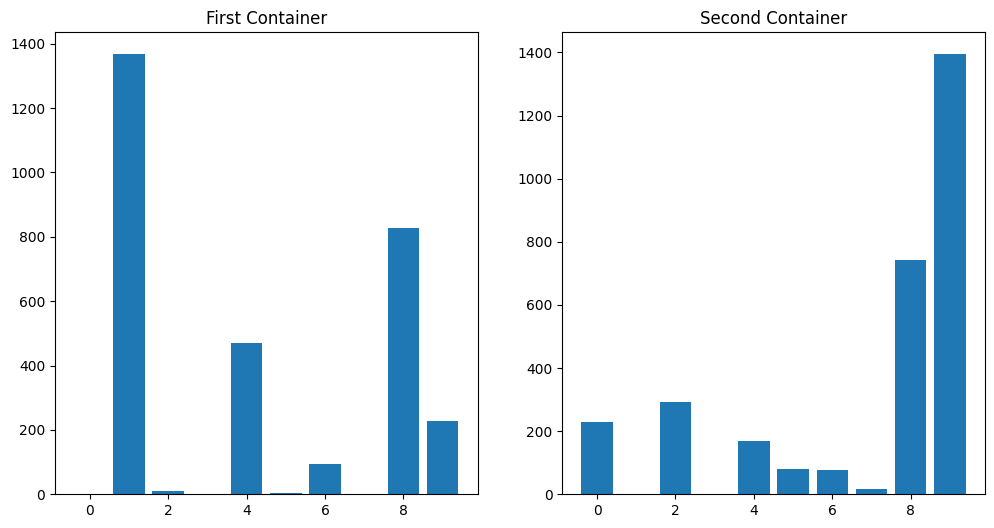

In [231]:
plt.figure(figsize=(12, 6))
plt.subplot(121).bar(first_buckets.keys(), first_buckets.values())
plt.title("First Container")
plt.subplot(122).bar(second_buckets.keys(), second_buckets.values())
plt.title("Second Container")

In [232]:
sorted(bests,key=lambda x: x[0],reverse=True)[:10]

[(np.float64(106178.42550599657), array([80,  6]), array([73,  4]), (1, 8)),
 (np.float64(94170.24928745115), array([80,  6]), array([73,  4]), (1, 8)),
 (np.float64(93281.53088465892), array([80,  6]), array([73,  4]), (1, 8)),
 (np.float64(92765.03526333955), array([80,  6]), array([73,  4]), (1, 8)),
 (np.float64(90637.57282100519), array([80,  6]), array([73,  4]), (1, 8)),
 (np.float64(90539.83475091628), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(90422.41137692472), array([80,  6]), array([73,  4]), (1, 8)),
 (np.float64(89740.46403784395), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(89656.61494091738), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(89464.30796591693), array([73,  4]), array([89,  8]), (8, 9))]

In [233]:
sum(best[0] for best in bests)/len(bests)

np.float64(64485.344934231536)

In [234]:
min([best[0] for best in bests])

np.float64(36597.51345449827)

In [235]:
max([best[0] for best in bests])

np.float64(106178.42550599657)

In [236]:
containers

array([[10,  1],
       [80,  6],
       [37,  3],
       [17,  1],
       [90, 10],
       [31,  2],
       [50,  4],
       [20,  2],
       [73,  4],
       [89,  8]])

In [237]:
n_distributions = 1000
distributions = generate_n_distributions(n_distributions)
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo_but_on_first(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[0])
    bests.append((best[0],container_dict[best[1][0]],container_dict[best[1][1]],best[1]))
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 3878.28it/s]


In [238]:
sorted(bests,key=lambda x: x[0],reverse=True)[:10]

[(np.float64(87820.06052259966), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(83349.00517546931), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(82910.47463895142), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(82464.11343027696), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(81104.35431945806), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(80704.93161835866), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(80462.34036146672), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(80324.26942048584), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(80270.23735141975), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(79970.901438366), array([73,  4]), array([89,  8]), (8, 9))]

In [239]:
sum(best[0] for best in bests)/len(bests)

np.float64(61880.88681479355)

In [240]:
min(best[0] for best in bests)

np.float64(43577.28280787944)

In [241]:
max([best[0] for best in bests])

np.float64(87820.06052259966)

In [242]:
def generate_random__dirichlet_distribution(size=10):
    return np.random.dirichlet(np.ones(size), size=1)[0]


In [244]:
generate_random__dirichlet_distribution()

array([0.01992993, 0.01903541, 0.14017861, 0.07191371, 0.0541015 ,
       0.17927773, 0.20906962, 0.06781044, 0.23248528, 0.00619776])

In [246]:
def generate_capped_distribution(size=10, cap=0.15):
    while True:
        values = np.random.rand(size)
        values = values / values.sum()  # Normalize to sum to 1

        # Clip values at the cap
        clipped = np.minimum(values, cap)
        clipped_sum = clipped.sum()

        # If the clipped sum is exactly 1, we’re done
        if np.isclose(clipped_sum, 1.0):
            return clipped

        # Redistribute the difference
        excess = 1.0 - clipped_sum
        room = cap - clipped  # Room left for each value
        room[clipped >= cap] = 0  # No room in already-capped values

        if room.sum() == 0:
            continue  # Try again — no space to redistribute

        # Proportionally redistribute the excess to values under the cap
        redistribute = (room / room.sum()) * excess
        adjusted = clipped + redistribute

        return adjusted


In [248]:
generate_capped_distribution()

array([0.10719342, 0.15      , 0.10454282, 0.11959504, 0.14725879,
       0.01550498, 0.12552971, 0.13924271, 0.04154057, 0.04959197])

In [268]:
first_buckets = {i:0 for i in range(10)}
second_buckets = {i:0 for i in range(10)}
n_distributions = 10000
distributions = [generate_random__dirichlet_distribution() for _ in range(n_distributions)]
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[0])
    bests.append((best[0],container_dict[best[1][0]],container_dict[best[1][1]],best[1]))
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress: 100%|██████████| 10000/10000 [00:01<00:00, 5082.48it/s]


In [269]:
max([best[0] for best in bests]), min([best[0] for best in bests]), sum(best[0] for best in bests)/len(bests)

(np.float64(284390.8523967954),
 np.float64(41767.57058780303),
 np.float64(142868.86937901002))

Text(0.5, 1.0, 'Second Container')

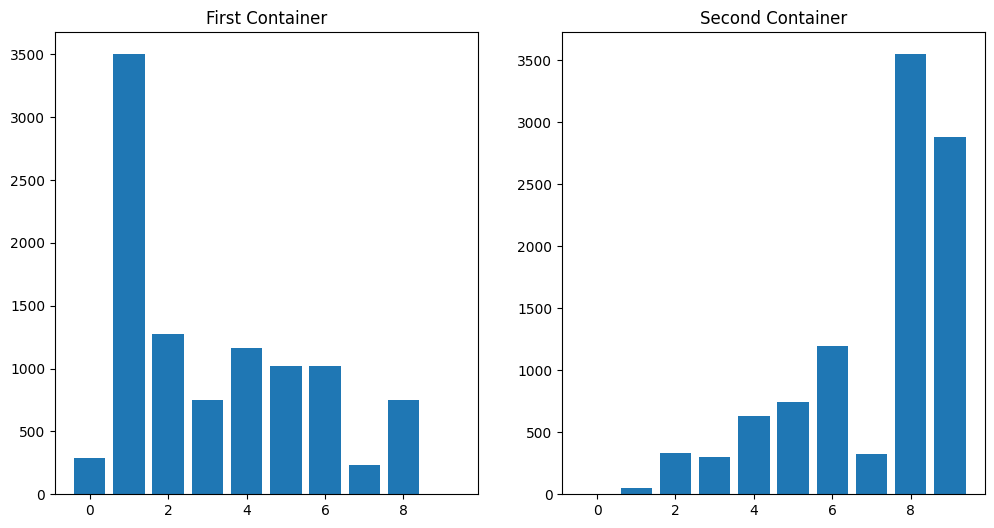

In [270]:
plt.figure(figsize=(12, 6))
plt.subplot(121).bar(first_buckets.keys(), first_buckets.values())
plt.title("First Container")
plt.subplot(122).bar(second_buckets.keys(), second_buckets.values())
plt.title("Second Container")

In [271]:
first_buckets = {i:0 for i in range(10)}
second_buckets = {i:0 for i in range(10)}
n_distributions = 10000
distributions = [generate_capped_distribution() for _ in range(n_distributions)]
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[0])
    bests.append((best[0],container_dict[best[1][0]],container_dict[best[1][1]],best[1]))
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress: 100%|██████████| 10000/10000 [00:01<00:00, 5010.70it/s]


In [272]:
max([best[0] for best in bests]), min([best[0] for best in bests]), sum(best[0] for best in bests)/len(bests)

(np.float64(225373.56686995726),
 np.float64(29226.40854047361),
 np.float64(87483.69429381557))

Text(0.5, 1.0, 'Second Container')

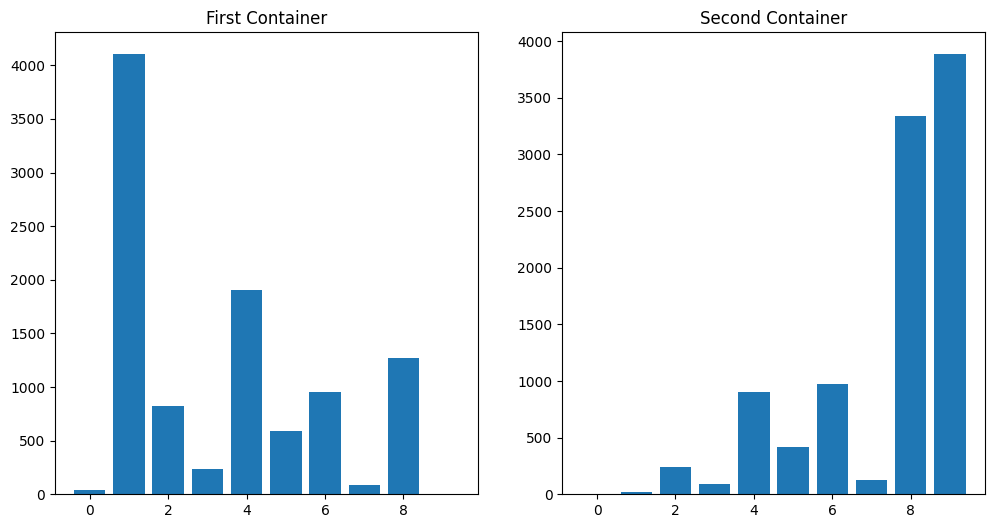

In [273]:
plt.figure(figsize=(12, 6))
plt.subplot(121).bar(first_buckets.keys(), first_buckets.values())
plt.title("First Container")
plt.subplot(122).bar(second_buckets.keys(), second_buckets.values())
plt.title("Second Container")

In [274]:
def generate_biased_distribution(delta_range=0.03):
    base = np.full(10, 0.5 / 6)  # Start with base value for non-biased containers
    bias_indices = [1, 4, 8, 9]

    for i in bias_indices:
        base[i] = 0.125

    # Apply random delta in ±delta_range
    deltas = np.random.uniform(-delta_range, delta_range, size=10)
    perturbed = base + deltas

    # Prevent negative values
    perturbed = np.clip(perturbed, 0, None)

    # Normalize to make the total sum to 1
    normalized = perturbed / perturbed.sum()

    return normalized


In [281]:
first_buckets = {i:0 for i in range(10)}
second_buckets = {i:0 for i in range(10)}
n_distributions = 10000
distributions = [generate_biased_distribution() for _ in range(n_distributions)]
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[0])
    bests.append((best[0],container_dict[best[1][0]],container_dict[best[1][1]],best[1]))
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress: 100%|██████████| 10000/10000 [00:01<00:00, 5237.82it/s]


In [282]:
max([best[0] for best in bests]), min([best[0] for best in bests]), sum(best[0] for best in bests)/len(bests)

(np.float64(60566.027008747784),
 np.float64(28931.41885317405),
 np.float64(43732.67778971372))

Text(0.5, 1.0, 'Second Container')

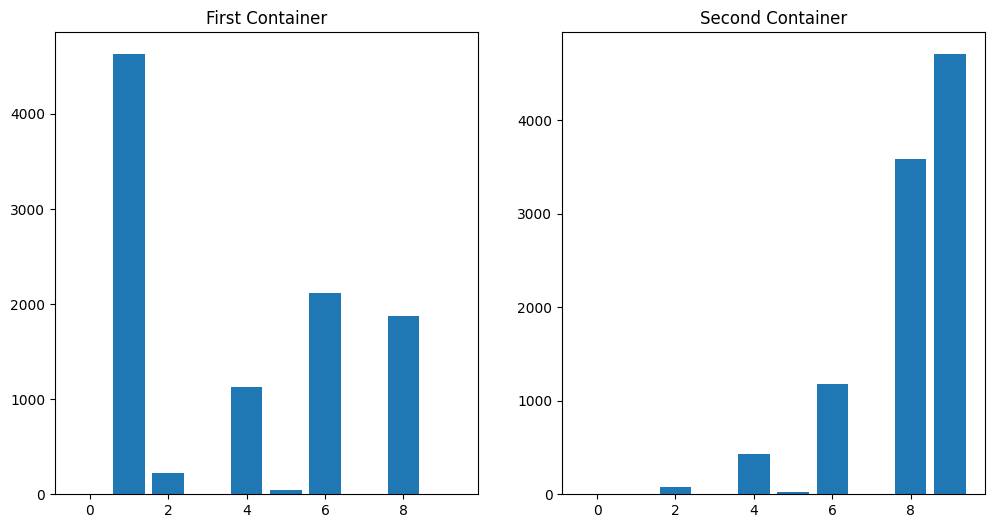

In [283]:
plt.figure(figsize=(12, 6))
plt.subplot(121).bar(first_buckets.keys(), first_buckets.values())
plt.title("First Container")
plt.subplot(122).bar(second_buckets.keys(), second_buckets.values())
plt.title("Second Container")